[*********************100%***********************]  1 of 1 completed

Index Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Columns: MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
Data Head:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716087  72.776613  71.466827  71.721034  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582924  72.621661  70.876090  71.127881  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403656  73.706287  71.943766  71.943766  132079200


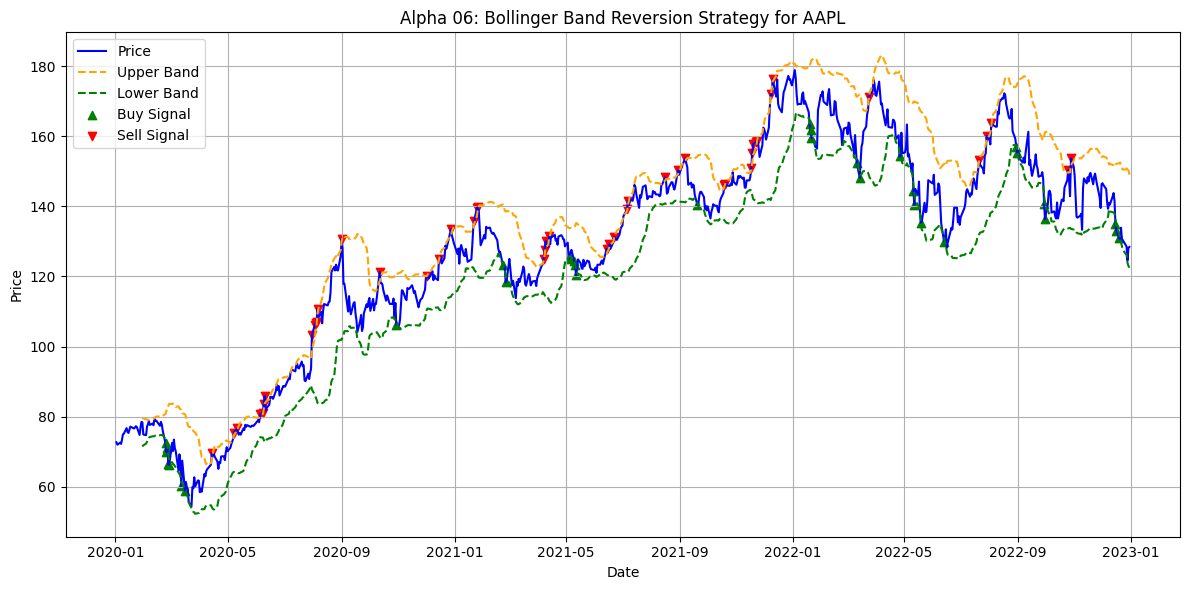

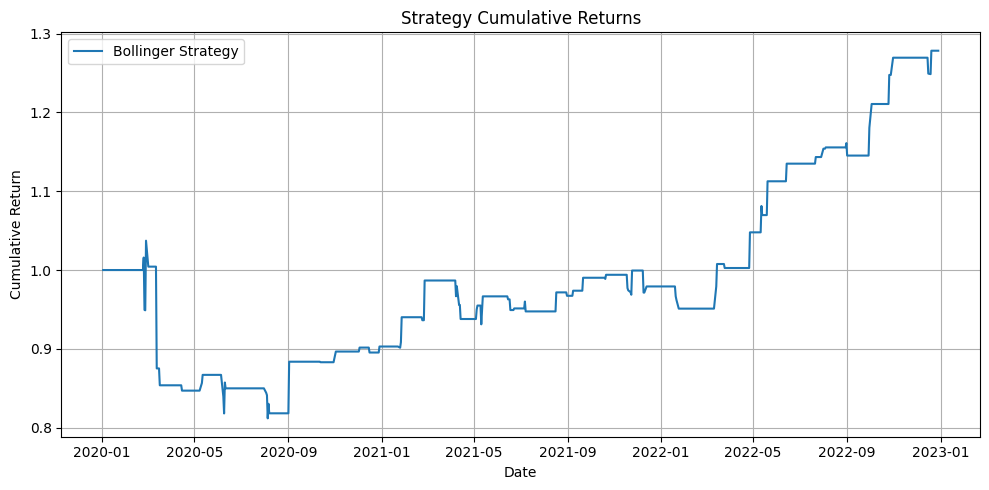

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# === Download historical data ===
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# === Check structure of data ===
print(f"Index Type: {type(data.index)}")
print(f"Columns: {data.columns}")
print(f"Data Head:\n{data.head()}")

# === Access the 'Close' column properly for the 'AAPL' ticker ===
price = data[('Close', 'AAPL')]  # Use tuple to access the 'Close' column for 'AAPL'

# === Bollinger Band calculations ===
window = 20
num_std = 2

rolling_mean = price.rolling(window).mean()
rolling_std = price.rolling(window).std()
upper_band = rolling_mean + num_std * rolling_std
lower_band = rolling_mean - num_std * rolling_std

# === Generate signals ===
signals = pd.Series(index=price.index, dtype='float64')
signals[price < lower_band] = 1    # Buy signal
signals[price > upper_band] = -1   # Sell signal
signals.fillna(0, inplace=True)

# === Backtest ===
daily_returns = price.pct_change().shift(-1)
strategy_returns = signals.shift(1) * daily_returns
cumulative_returns = (1 + strategy_returns).cumprod()

# === Plot price and Bollinger bands ===
plt.figure(figsize=(12, 6))
plt.plot(price, label='Price', color='blue')
plt.plot(upper_band, label='Upper Band', linestyle='--', color='orange')
plt.plot(lower_band, label='Lower Band', linestyle='--', color='green')

# Highlight Buy and Sell signals
plt.scatter(price.index[signals == 1], price[signals == 1], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(price.index[signals == -1], price[signals == -1], marker='v', color='r', label='Sell Signal', alpha=1)

plt.title(f'Alpha 06: Bollinger Band Reversion Strategy for {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot cumulative returns ===
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='Bollinger Strategy')
plt.title("Strategy Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
